<a href="https://colab.research.google.com/github/emm-gl/WA2501_Machine_Learning_AI/blob/main/M%26DL2501-Math%26DeepLearning/Bloque05/DL_Autoencoder_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder para Detección de Fraude con Tarjetas de Crédito

Este notebook implementa un autoencoder en TensorFlow para el dataset de fraude [link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data).

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib import pyplot as plt

## Cargar dataset

In [3]:
df = pd.read_csv('/content/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Missing values per column:
V24       1
V25       1
V26       1
Class     1
Amount    1
V28       1
V27       1
V23       1
V20       1
V21       1
V22       1
V19       1
Time      0
V1        0
V2        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V15       0
V16       0
V17       0
V18       0
dtype: int64


In [6]:
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True).rename('proportion'))


Class distribution:
Class
0.0    0.998243
1.0    0.001757
Name: proportion, dtype: float64


In [7]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

## Preprocesamiento

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## División de train/test y selección de datos normales

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_normal = X_train[y_train == 0]

## Modelo Autoencoder

In [10]:
input_dim = X_train_normal.shape[1]
inputs = tf.keras.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(16, activation='relu')(inputs)
encoded = tf.keras.layers.Dense(8, activation='relu')(encoded)

bottleneck = tf.keras.layers.Dense(4, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(8, activation='relu')(bottleneck)
decoded = tf.keras.layers.Dense(16, activation='relu')(decoded)
outputs = tf.keras.layers.Dense(input_dim, activation='linear')(decoded)
autoencoder = tf.keras.Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

## Entrenamiento

In [11]:
history = autoencoder.fit(X_train_normal, X_train_normal, epochs=20, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9033 - val_loss: 0.7248
Epoch 2/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7139 - val_loss: 0.6770
Epoch 3/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6872 - val_loss: 0.6478
Epoch 4/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6495 - val_loss: 0.6212
Epoch 5/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6212 - val_loss: 0.5989
Epoch 6/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6055 - val_loss: 0.5857
Epoch 7/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5868 - val_loss: 0.5771
Epoch 8/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5816 - val_loss: 0.5693
Epoch 9/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5948 - val_loss: 0.5606
Epoch 10/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5607 - val_loss: 0.5565
Epoch 11/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5504 - val_loss: 0.5504
Epoch 12/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

## Errores de reconstrucción y umbral

6919/6919 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


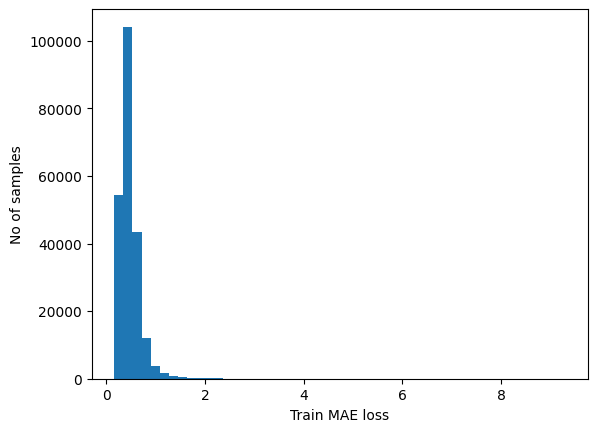

In [12]:
x_train_pred = autoencoder.predict(X_train_normal)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train_normal), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

In [13]:
threshold = np.quantile(train_mae_loss, [0.99])[0]
threshold

np.float64(1.2686005822512716)

In [14]:
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - X_test_pred), axis=1)



1733/1733 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [15]:
reconstruction_error

array([0.36642371, 0.66150768, 1.60800739, ..., 0.33275789, 0.45363204,
       0.24932928])

## Clasificación y métricas

In [16]:
y_pred = (reconstruction_error > threshold).astype(int)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[56283   581]
 [   21    77]]


In [ ]:
y_pred = (reconstruction_error > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     56864
           1       0.00      0.98      0.01        98

    accuracy                           0.61     56962
   macro avg       0.50      0.79      0.38     56962
weighted avg       1.00      0.61      0.75     56962



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[34513 22351]
 [    2    96]]
